In [45]:
import pandas as pd
import sklearn.model_selection

In [46]:
from datasets import load_dataset

dataset = load_dataset("mstz/wine", "wine")

Found cached dataset wine (C:/Users/s487176/.cache/huggingface/datasets/mstz___wine/wine/1.0.0/0913b614badc418a000d75d098776831f39ebf5ee208ecd3cfad4d5db1418d76)


  0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
dataset["train"]

Dataset({
    features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color'],
    num_rows: 6497
})

In [48]:
wine_dataset = pd.DataFrame(dataset["train"])

In [49]:
wine_dataset.head()# podgląd danych

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [50]:
wine_dataset.describe(include='all')

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

<Axes: >

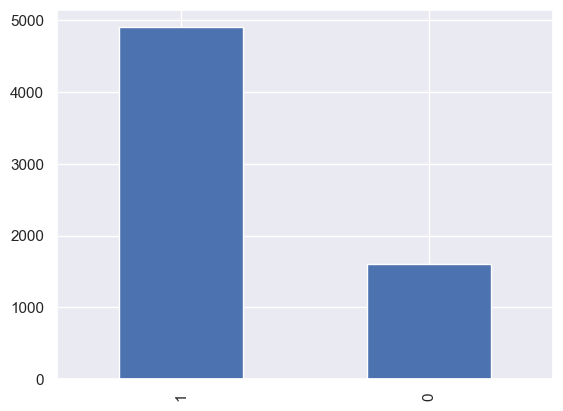

In [51]:
wine_dataset["color"].value_counts().plot(kind="bar")




In [52]:
wine_dataset["fixed_acidity"].std()

1.2964337577998153

In [53]:
import numpy as np
np.where(pd.isnull(wine_dataset))## sprawdzanie czy istnieją puste wartości

(array([], dtype=int64), array([], dtype=int64))

In [54]:
for column in wine_dataset.columns:
    wine_dataset[column] = wine_dataset[column]  / wine_dataset[column].abs().max() # normalizacja

In [55]:
wine_dataset.describe(include='all') # sprawdzanie wartości po znormalizowaniu

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.453793          0.214978     0.191948        0.082724   
std         0.081537          0.104200     0.087541        0.072307   
min         0.238994          0.050633     0.000000        0.009119   
25%         0.402516          0.145570     0.150602        0.027356   
50%         0.440252          0.183544     0.186747        0.045593   
75%         0.484277          0.253165     0.234940        0.123100   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.091708             0.105624              0.263056     0.957378   
std       0.057338             0.061417              0.128459     0.002886   
min       0.014730             0.003460              0.013636     0.950076   
25%       0.062193             0.058824              0.175000     0.955110   
50%       0.076923             0.100346              0.268182     0.957564   
75%       0.106383             0.141869              0.354545     0.959585   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.802619     0.265634     0.704148     0.646486     0.753886  
std       0.040097     0.074403     0.080048     0.097028     0.430779  
min       0.678304     0.110000     0.536913     0.333333     0.000000  
25%       0.775561     0.215000     0.637584     0.555556     1.000000  
50%       0.800499     0.255000     0.691275     0.666667     1.000000  
75%       0.827930     0.300000     0.758389     0.666667     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [56]:
wine_dataset["fixed_acidity"].nlargest(10) #sprawdza czy najwyższe wartości mają sens

652     1.000000
442     0.981132
557     0.981132
554     0.974843
555     0.974843
243     0.943396
244     0.943396
544     0.899371
3125    0.893082
374     0.880503
Name: fixed_acidity, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
wine_train, wine_test = sklearn.model_selection.train_test_split(wine_dataset, test_size=0.1, random_state=1, stratify=wine_dataset["color"])
wine_train["color"].value_counts() 
# podzielenie na train i test

1.0    4408
0.0    1439
Name: color, dtype: int64

In [58]:
wine_test["color"].value_counts()

1.0    490
0.0    160
Name: color, dtype: int64

In [59]:
wine_test, wine_val = sklearn.model_selection.train_test_split(wine_test, test_size=0.5, random_state=1, stratify=wine_test["color"]) # podzielenie na test i validation

In [60]:
wine_test["color"].value_counts()

1.0    245
0.0     80
Name: color, dtype: int64

In [61]:
wine_val["color"].value_counts()

1.0    245
0.0     80
Name: color, dtype: int64

In [62]:
import seaborn as sns
sns.set_theme()

In [63]:
len(wine_dataset.columns)

13

In [64]:
sns.pairplot(data=wine_dataset, hue="color")

In [ ]:
wine_test.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        7.127077          0.342969     0.299846        5.197538   
std         1.181391          0.170050     0.129556        4.608978   
min         5.000000          0.100000     0.000000        0.800000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         6.900000          0.280000     0.300000        2.800000   
75%         7.500000          0.400000     0.370000        7.500000   
max        13.000000          0.900000     0.740000       22.000000   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.054222            29.773846            113.283077    0.994568   
std      0.031405            15.822670             55.072566    0.002895   
min      0.019000             3.000000              9.000000    0.988190   
25%      0.037000            17.000000             74.000000    0.992400   
50%      0.048000            29.000000            115.000000    0.994800   
75%      0.062000            41.000000            151.000000    0.996750   
max      0.415000            67.000000            253.000000    1.002890   

               pH   sulphates     alcohol     quality       color  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     3.222246    0.527754   10.488564    5.815385    0.753846  
std      0.159630    0.144550    1.172682    0.855128    0.431433  
min      2.860000    0.260000    8.500000    3.000000    0.000000  
25%      3.110000    0.420000    9.500000    5.000000    1.000000  
50%      3.210000    0.500000   10.300000    6.000000    1.000000  
75%      3.320000    0.600000   11.300000    6.000000    1.000000  
max      3.680000    1.170000   14.000000    9.000000    1.000000

In [ ]:
wine_train.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.216179          0.339796     0.319111        5.417402   
std         1.299695          0.164817     0.146141        4.736399   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056310            30.535403            115.673508     0.994682   
std       0.035816            17.845522             56.432512     0.002995   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.500000     0.992300   
50%       0.047000            29.000000            118.000000     0.994840   
75%       0.065000            41.000000            155.500000     0.996985   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  5847.000000  5847.000000  5847.000000  5847.000000  5847.000000  
mean      3.218303     0.531596    10.494455     5.820592     0.753891  
std       0.159919     0.149728     1.189801     0.872353     0.430780  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [ ]:
wine_val.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        7.287846          0.334031     0.328831        6.153692   
std         1.345471          0.156023     0.144192        5.220944   
min         4.700000          0.090000     0.000000        0.800000   
25%         6.400000          0.230000     0.260000        2.000000   
50%         7.100000          0.290000     0.310000        4.550000   
75%         7.800000          0.400000     0.400000        8.800000   
max        15.000000          1.180000     0.740000       31.600000   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.052874            31.095385            119.484615    0.995091   
std      0.021471            17.861741             59.481580    0.003150   
min      0.012000             3.000000              8.000000    0.987460   
25%      0.039000            16.000000             79.000000    0.992700   
50%      0.048000            29.000000            125.000000    0.995320   
75%      0.060000            45.000000            163.000000    0.997450   
max      0.170000            77.000000            251.000000    1.010300   

               pH   sulphates     alcohol     quality       color  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     3.218308    0.528892   10.447282    5.781538    0.753846  
std      0.177176    0.136171    1.265593    0.908617    0.431433  
min      2.870000    0.280000    8.400000    3.000000    0.000000  
25%      3.100000    0.430000    9.400000    5.000000    1.000000  
50%      3.210000    0.500000   10.200000    6.000000    1.000000  
75%      3.320000    0.610000   11.300000    6.000000    1.000000  
max      4.010000    1.140000   14.000000    8.000000    1.000000